In [3]:
from scipy.stats import normaltest
import pandas as pd
populacao = pd.read_csv('https://github.com/Alixandrini/PPEC0039/raw/refs/heads/main/Aula%2010/steel_strength.csv')
populacao1 = pd.read_csv('https://github.com/Alixandrini/PPEC0039/raw/refs/heads/main/Aula%2010/concrete.csv')

populacao1.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
amostra = populacao[populacao['mo']>0.5].sample(100)
amostra.head()

,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
288,Fe0.803C0.0174Mn0.00236Si0.000201Cr0.0779Ni0.0...,0.37,0.23,0.01,7.19,0.01,5.71,1.10,0.0,0.78,4.99,0.0,0.03,0.00,1340.1,1998.1,10.0
126,Fe0.709C0.0103Mn0.000102Si0.000200Cr0.0328Ni0....,0.22,0.01,0.01,3.03,11.17,1.18,0.01,0.0,0.01,13.89,0.0,0.03,0.01,1810.0,1970.0,12.2
263,Fe0.789Mn0.000719Si0.00161Cr0.0814Ni0.101Mo0.0...,0.00,0.07,0.08,7.50,10.50,3.30,0.01,0.0,0.01,0.01,0.0,0.21,0.23,1263.6,1279.5,16.0
201,Fe0.755C0.00185Mn0.000101Si0.000198Cr0.134Ni0....,0.04,0.01,0.01,12.58,8.39,2.20,0.01,0.0,0.01,0.01,0.0,0.77,0.02,1280.2,1343.8,18.4
161,Fe0.730C0.00414Mn0.0101Si0.00983Cr0.186Ni0.039...,0.09,1.00,0.50,17.50,4.20,2.75,0.01,0.1,0.01,0.01,0.0,0.03,0.00,1016.4,1324.4,12.0


# Teste de Normalidade

A função shapiro.test testa a hipótese nula  𝐻0  de que a amostra é proveniente de uma distribuição normal, ou seja, os dados são normalmente distribuídos.
**Rejeitar  𝐻0 (ser normal) se o valor  𝑝≤𝛼**

<Axes: xlabel='mo', ylabel='Count'>

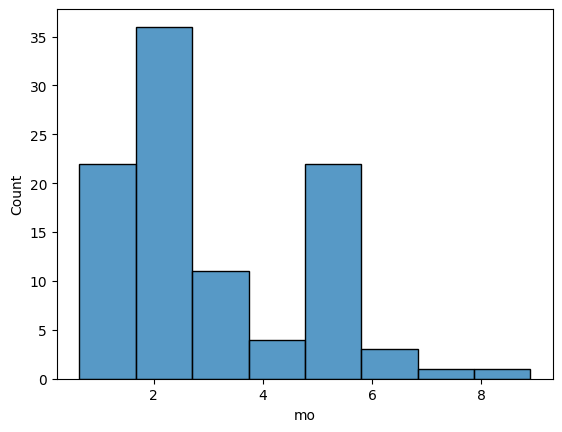

In [10]:
import seaborn as sns
sns.histplot(amostra['mo'])

In [6]:
normaltest(amostra['mo'])

NormaltestResult(statistic=np.float64(12.152492292883345), pvalue=np.float64(0.0022967822750099226))

p valor menor que significancia 5%, entao rejeita H0, ser normal, logo nao eh normal[texto do link  

<Axes: xlabel='ti', ylabel='Count'>

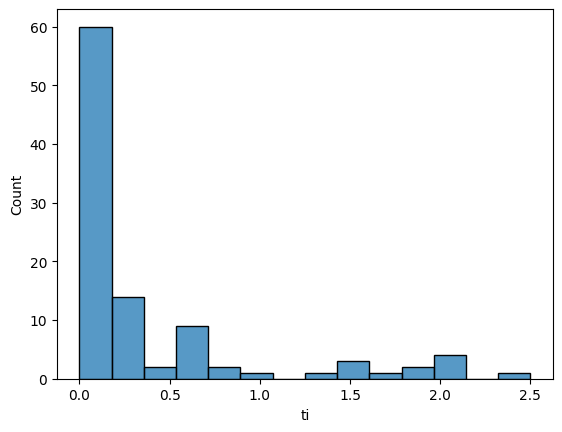

In [9]:
import seaborn as sns
sns.histplot(amostra['ti'])

In [13]:
normaltest(amostra['ti'])

NormaltestResult(statistic=np.float64(46.52977111654857), pvalue=np.float64(7.873876159793794e-11))

p valor maior que significancia 5%, entao NAO rejeita H0 (ser normal)

# Teste de Hipotese

##Teste Bicaudal

A empresa Suco Bom produz sucos de frutas em embalagens de 500 ml. Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa Suco Bom extrai, periodicamente, amostras de 50 embalagens para monitorar o processo de produção. Para cada amostra, é realizado um teste de hipóteses para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um nível de significância de 5%.

Suponha agora que uma amostra de 50 embalagens foi selecionada e que a média amostral observada foi de 503,24 ml e desvio padrao 4,48. Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?



In [14]:
from scipy.stats import norm
from numpy import sqrt
#Hipotese de ser igual, significa um bicaudal com h0 da medias serem iguais
#𝐻0:𝜇=500
#𝐻1:𝜇≠500
u=500
n =50
sig=0.05
z_sig_sob2 = norm.ppf(sig/2)
print(z_sig_sob2)
x=503.24
s=4.48
z=(x-u)/(s/sqrt(n))
z

-1.9599639845400545


np.float64(5.113897256795581)

In [15]:

area=norm.cdf(z)
print(area)
pvalor=2*(1-area)
print(pvalor)
if (pvalor <= sig):
    print('rejeita h0')
else:
    print('aceita h0')

#Rejeitar  𝐻0  se o valor  𝑝≤𝛼

0.9999998422104751
3.155790497810784e-07
rejeita h0


In [16]:
from statsmodels.stats.weightstats import ztest
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505,
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505,
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501,
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495,
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]
ztest(x1 = amostra, value = u)


(np.float64(5.109559775991873), np.float64(3.229103172445771e-07))

Conclusão: Como a média amostral  𝑥¯  é significativamente maior que 500 ml, rejeitamos  𝐻0 . Neste caso, devem ser tomadas providências para ajustar o maquinário que preenche as embalagens.



##Teste Unicaudal

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, no máximo, 37 gramas de açúcar. Esta alegação nos leva a entender que a quantidade média de açúcar em uma lata de refrigerante deve ser igual ou menor que 37 g.
Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatóriamente, em um conjunto de estabelecimentos distintos, uma amostra de 25 latas do refrigerante em questão. Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?



In [17]:
from scipy.stats import t as t_student
from numpy import mean, std
#𝐻0:𝜇≤37
#𝐻1:𝜇>37
amostra = [37.27, 36.42, 34.84, 34.60, 37.49,
           36.53, 35.49, 36.90, 34.52, 37.30,
           34.99, 36.55, 36.29, 36.06, 37.42,
           34.47, 36.70, 35.86, 36.80, 36.92,
           37.04, 36.39, 37.32, 36.64, 35.45]
n=25
u=37
x=mean(amostra)
s=std(amostra)
sig<-0.05
conf = 1-sig
graus_de_lib = n-1
t_sig = t_student.ppf(conf, graus_de_lib)
print(t_sig)
t = (x - u) / (s / sqrt(n))
t

1.7108820799094275


np.float64(-3.9568374713288734)

In [18]:
pvalor = 1-t_student.cdf(t, df = graus_de_lib)
pvalor
#Rejeitar  𝐻0  se o valor  𝑝≤𝛼

np.float64(0.9997062063779475)

In [19]:
from statsmodels.stats.weightstats import DescrStatsW
test = DescrStatsW(amostra)
test.ttest_mean(value = u, alternative = 'larger')

(np.float64(-3.8768931199520447),
 np.float64(0.9996406170303819),
 np.float64(24.0))

Conclusão: Com um nível de confiança de 95% não podemos rejeitar  𝐻0 , ou seja, a alegação do fabricante é verdadeira.


##Teste duas amostras

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleatórias, uma de 500 homens e outra com 500 mulheres, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade, teste a igualdade das médias entre estas duas amostras com um nível de significância de 1%.

In [20]:
homens = [300, 1000, 4000, 5000, 300, 350, 1200, 1200, 1100, 1800, 700, 5000, 250, 1560, 400, 5500, 3000, 0, 1100, 1500, 500, 500, 788, 500, 3000, 788, 2400, 788, 3300, 1350, 2500, 2000, 1300, 2430, 9000, 10120, 1380, 2000, 1400, 1000, 500, 1500, 2200, 2100, 4000, 1000, 1200, 2900, 1800, 2000, 788, 1576, 800, 2400, 788, 788, 788, 0, 12000, 7880, 850, 1000, 1000, 1600, 3800, 788, 1200, 300, 350, 700, 6000, 1500, 5000, 2000, 1200, 800, 250, 800, 1600, 400, 3000, 2304, 800, 1400, 450, 788, 2200, 6000, 1200, 4000, 6000, 1100, 1200, 1300, 3000, 3000, 1500, 1280, 788, 1400, 788, 4000, 0, 1000, 2500, 1300, 3000, 500, 1600, 2000, 1280, 150, 0, 0, 7000, 1061, 700, 788, 2000, 788, 10500, 788, 1600, 1050, 1100, 3000, 800, 1400, 1200, 2500, 1000, 1500, 1500, 900, 2000, 300, 3000, 788, 1400, 2000, 2000, 3000, 2600, 15000, 1500, 950, 1200, 1500, 7500, 1400, 350, 750, 1200, 788, 0, 2500, 1700, 788, 700, 1600, 1200, 320, 6000, 2000, 2000, 3000, 900, 2100, 0, 788, 1800, 1600, 4000, 1300, 1300, 1500, 8900, 1400, 788, 600, 1000, 950, 2000, 4000, 2300, 2000, 800, 2500, 1500, 1400, 800, 6000, 788, 900, 200, 1300, 788, 2600, 1500, 8000, 900, 2000, 2000, 350, 3000, 9580, 0, 400, 800, 1700, 1800, 1200, 18000, 9000, 3000, 1200, 700, 1200, 400, 987, 6000, 2000, 0, 0, 480, 500, 800, 1680, 10000, 1200, 1700, 788, 2200, 10000, 10000, 100, 1200, 1600, 2500, 1300, 1200, 1300, 2200, 200, 60, 1100, 1200, 6000, 4500, 100, 788, 2900, 2500, 900, 788, 2500, 4000, 788, 1400, 1000, 300, 788, 1000, 4000, 2200, 788, 1000, 1000, 600, 1600, 6000, 2500, 2500, 1000, 3000, 2200, 4500, 1500, 4300, 1500, 8500, 3200, 1200, 1200, 1500, 4000, 2000, 1350, 1500, 890, 5000, 2400, 13000, 800, 1500, 1500, 2000, 580, 500, 920, 1200, 2000, 788, 500, 20000, 1350, 1576, 500, 8000, 1800, 600, 1000, 3000, 4000, 1500, 788, 600, 2300, 1500, 500, 500, 800, 900, 8000, 1600, 3000, 788, 1500, 5200, 900, 3565, 650, 1700, 1600, 788, 1200, 788, 788, 100, 900, 1700, 10000, 1600, 200, 788, 1400, 1500, 400, 4200, 1400, 4000, 5516, 3500, 700, 1400, 1200, 0, 7000, 2000, 5000, 2000, 750, 3000, 2000, 1500, 200, 3000, 1700, 1500, 7000, 1500, 788, 2400, 2500, 1500, 2000, 1500, 2000, 1100, 800, 1800, 480, 3500, 700, 3400, 5000, 5000, 1300, 3000, 2000, 900, 2000, 1000, 1800, 0, 1500, 788, 3500, 875, 5000, 2000, 1300, 1600, 0, 750, 1200, 120, 1800, 1200, 788, 1000, 0, 1400, 2300, 7000, 4000, 5000, 788, 20000, 4000, 0, 1200, 1800, 500, 1000, 788, 1300, 5000, 50, 1700, 2000, 1600, 2000, 1350, 1500, 600, 1700, 780, 2446, 2100, 5000, 1700, 1200, 1000, 788, 4500, 1500, 788, 0, 1580, 1000, 4500, 2400, 788, 1100, 2000, 788, 100, 1200, 1200, 1200, 1000, 2000, 788, 2000, 15000, 600, 0, 1500, 3000, 4000, 900, 810, 600, 1500, 4000, 1200, 5000, 5300, 2500, 800, 0, 1400, 1500, 4000, 1200, 400, 1000, 820, 1000, 1000, 788, 1500, 2500, 1500, 220, 600, 788, 1750, 7000]
mulheres = [788, 1200, 6000, 1000, 788, 1100, 1900, 1577, 900, 950, 1200, 788, 788, 1100, 30, 620, 900, 1000, 1200, 2000, 0, 500, 1200, 1500, 1200, 1120, 788, 788, 2300, 2400, 3000, 788, 4000, 1000, 500, 500, 1700, 200, 6000, 400, 950, 1100, 50, 930, 850, 1100, 3500, 1500, 1200, 900, 1100, 1500, 788, 1000, 788, 4500, 4000, 8000, 3500, 788, 1050, 1000, 1400, 3500, 600, 3000, 500, 930, 2660, 788, 360, 2364, 788, 160, 1100, 1085, 1050, 1500, 100, 0, 788, 250, 1700, 1300, 800, 0, 2000, 820, 910, 300, 2000, 200, 788, 788, 800, 1500, 1300, 1200, 0, 600, 1036, 400, 1100, 788, 400, 1500, 1200, 1800, 1000, 788, 850, 60, 1800, 3500, 600, 200, 500, 200, 1100, 1540, 1100, 900, 800, 500, 200, 1200, 1250, 788, 500, 200, 788, 200, 0, 1800, 2000, 1000, 900, 3000, 700, 1200, 788, 2800, 3300, 400, 0, 850, 1022, 6000, 750, 1000, 3500, 400, 1500, 1000, 800, 0, 980, 2400, 850, 1100, 788, 1100, 788, 1200, 788, 864, 1000, 500, 400, 3000, 1200, 100, 80, 900, 2000, 1250, 1000, 300, 400, 1500, 60, 8000, 1000, 600, 800, 350, 788, 0, 600, 788, 2500, 1300, 800, 8000, 1100, 800, 900, 2000, 0, 800, 1400, 1000, 1200, 788, 3840, 788, 3940, 788, 560, 800, 2000, 600, 2900, 0, 400, 800, 7000, 788, 788, 788, 788, 1250, 1500, 1386, 100, 300, 788, 788, 600, 600, 900, 2800, 788, 350, 900, 0, 150, 788, 788, 1000, 30, 788, 780, 900, 0, 0, 3000, 1800, 2000, 1100, 788, 0, 7500, 1800, 788, 788, 2000, 3000, 180, 2500, 800, 0, 1250, 200, 1100, 0, 1100, 400, 1300, 300, 0, 1312, 600, 200, 4000, 2400, 12000, 2150, 500, 400, 0, 600, 400, 788, 1200, 500, 2000, 1500, 70, 500, 2000, 1000, 100, 500, 2000, 100, 2115, 800, 5800, 2300, 750, 788, 0, 900, 1000, 600, 3000, 5500, 1600, 788, 4000, 0, 1100, 120, 320, 1100, 2500, 200, 800, 3000, 550, 4200, 7000, 720, 0, 2000, 5000, 2000, 788, 500, 788, 7000, 500, 788, 1760, 1200, 3500, 1500, 150, 800, 788, 3000, 400, 788, 1000, 2000, 2500, 0, 788, 5200, 788, 0, 600, 1300, 120, 850, 1576, 788, 2000, 1300, 788, 800, 1800, 655, 1580, 789, 788, 850, 788, 7000, 788, 430, 800, 788, 900, 10000, 1200, 300, 400, 788, 788, 3000, 900, 1300, 1300, 788, 800, 1000, 1890, 0, 788, 900, 4000, 788, 1010, 150, 450, 1700, 890, 1200, 2800, 1000, 788, 788, 700, 600, 800, 880, 6000, 800, 800, 820, 788, 1030, 560, 2100, 6500, 2500, 788, 400, 300, 788, 2300, 1000, 3500, 984, 1576, 420, 1700, 450, 1800, 400, 1500, 1500, 4256, 1200, 890, 1200, 300, 400, 850, 1500, 3800, 1800, 996, 2000, 1000, 788, 1500, 300, 600, 950, 1200, 788, 1200, 1500, 250, 788, 1200, 6000, 300, 789, 1500, 788, 3800, 780, 1200, 1200, 220, 788, 500, 200, 480, 1576, 1576, 1035, 900, 800, 1000, 805, 200, 1200, 2220, 1500, 880, 220, 2000, 788, 150, 0, 13000, 40, 5500, 788, 788, 1000, 400, 2000, 200, 1600]

In [21]:
from numpy import mean, std
xH = mean(homens)
sH = std(homens)
xM = mean(mulheres)
sM = std(mulheres)
print(xH)
print(sH)
print(xM)
print(sM)

2142.608
2545.5014763963504
1357.528
1568.330503821181


In [22]:

#𝜇1⇒  Média das rendas dos chefes de domicílios do sexo masculino
#𝜇2⇒  Média das rendas dos chefes de domicílios do sexo feminino
#{𝐻0:𝜇1≤𝜇2
#𝐻1:𝜇1>𝜇2
#ou
#{𝐻0:𝜇1−𝜇2≤0
#𝐻1:𝜇1−𝜇2>0
sig = 0.01
conf = 1 - sig
z_sig = norm.ppf(conf)
print(z_sig)
nM = 500
nH = 500
D0 = 0
numerador = (xH - xM) - D0
denominador = sqrt((sH ** 2 / nH) + (sM ** 2 / nM))
z = numerador / denominador
z

2.3263478740408408


np.float64(5.871494490942365)

In [23]:

p_valor = 1-norm.cdf(z)
p_valor
#Rejeitar  𝐻0  se o valor  𝑝≤𝛼

np.float64(2.1594197541219273e-09)

In [24]:
from statsmodels.stats.weightstats import CompareMeans
comparador_medias = CompareMeans(DescrStatsW(homens), DescrStatsW(mulheres))
comparador_medias.ztest_ind(alternative='larger', value=0)

(np.float64(5.865620057764754), np.float64(2.2372867859458255e-09))

Conclusão: Com um nível de confiança de 99% rejeitamos  𝐻0 , isto é, concluímos que a média das rendas dos chefes de domicílios do sexo masculino é maior que a média das rendas das chefes de domicílios do sexo feminino. Confirmando a alegação de desigualdade de renda entre os sexos.

#Testes Nao Parametricos

##Teste do Qui-Quadrado (  𝜒2 )

In [25]:
from scipy.stats import chi
#𝐻0:𝐹𝐶𝐴𝑅𝐴=𝐹𝐶𝑂𝑅𝑂𝐴
#𝐻1:𝐹𝐶𝐴𝑅𝐴≠𝐹𝐶𝑂𝑅𝑂𝐴
Fobs =[17, 33]
Fesp =[25, 25]
sig  = 0.05
conf = 1 - sig
k = 2 # Número de eventos possíveis
graus_de_lib = k - 1
chi_2_sig = chi.ppf(conf, graus_de_lib) ** 2
print(chi_2_sig)
chi_2 = 0
for i in range(0,k,1):
    chi_2=chi_2+(Fobs[i]-Fesp[i])**2/Fesp[i]

chi_2

3.8414588206941245


5.12

In [26]:
from numpy import sqrt
1-chi.cdf(sqrt(chi_2), df=graus_de_lib)
#Rejeitar  𝐻0  se o valor  𝑝≤𝛼

np.float64(0.023651616655355978)

In [27]:
from scipy.stats import chisquare
chisquare(f_obs=Fobs, f_exp=Fesp)

Power_divergenceResult(statistic=np.float64(5.12), pvalue=np.float64(0.023651616655356))

Conclusão: Com um nível de confiança de 95% rejeitamos a hipótese nula ( 𝐻0 ) e concluímos que as frequências observadas e esperadas são discrepantes, ou seja, a moeda não é honesta e precisa ser substituída.

#Teste Pareado (Teste Wilcoxon)

In [28]:
import pandas as pd
fumo = {
    'Antes': [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49],
    'Depois': [16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9, 6]
}
fumo = pd.DataFrame(fumo)
fumo.head()

,Antes,Depois
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14


In [ ]:
from scipy.stats import wilcoxon
significancia = 0.05
confianca = 1 - significancia
n = 35
wilcoxon(fumo['Antes'], fumo['Depois'])

WilcoxonResult(statistic=22.0, pvalue=1.584310018505865e-06)

Conclusão: Rejeitamos a hipótese de que não existe diferença entre os grupos, isto é, existe uma diferença entre as médias de cigarros fumados pelos pacientes antes e depois do tratamento. E como é possível verificar através das médias de cigarros fumados por dia antes (31.86) e depois (11.2) do tratamento, podemos concluir que o tratamento apresentou resultado satisfatório.